

# **Lista 01 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André da Costa e Lucas Althoff


---



**Instruções**: Coloque os arquivos lenna_cinza.png, odd_rows.mat e even_rows.mat no diretório desse trabalho (acho que é só arrastar para a pasta alí <<) e rode célula por célula, até o final da questão 2. Obrigado! 

**Bibliotecas que serão utilizadas. Por favor, rode este código primeiro.**




In [ ]:
from PIL import Image
import matplotlib.pyplot as pylab
import numpy as np 
import math
import matplotlib.image as img  
import cv2
import time

## **Problema 1**: Interpolação

# 1.1 - Interpolação Nearest (vizinho mais próximo)

**1.1-1** - Desenvolva uma função em Python para reduzir ou aumentar a resolução espacial de uma imagem por um fator n. O fator n deve ser fornecido à função pelo usuário e a função deve ser implementada utilizando o algoritmo de interpolação vizinho-mais-próximo.

In [ ]:
def interpolacao_nearest(imagem_original,n,opcao):
    original_lagura,original_altura = imagem_original.shape[0],imagem_original.shape[1]
    if opcao == 1:
      nova_altura = imagem_original.shape[0]//n
      nova_largura = imagem_original.shape[1]//n
    if opcao == 2:
      nova_altura = imagem_original.shape[0]*n
      nova_largura = imagem_original.shape[1]*n
    interpolada = np.zeros((nova_altura,nova_largura,3))  
    for i in range(nova_altura):
        for j in range(nova_largura):
            escala_x = int(i*(original_altura/nova_altura))
            escala_y = int(j*(original_lagura/nova_largura))
            interpolada[i,j]=imagem_original[escala_x,escala_y]
    return interpolada

**1.1-2** - Escolha uma imagem com resolução mínima de 512x512 e utilize o seu programa para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16. Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original. Visualize todas as imagens obtidas e comente sobre as diferenças de qualidade entre elas.

# Imagem Original - lenna_cinza.png



> 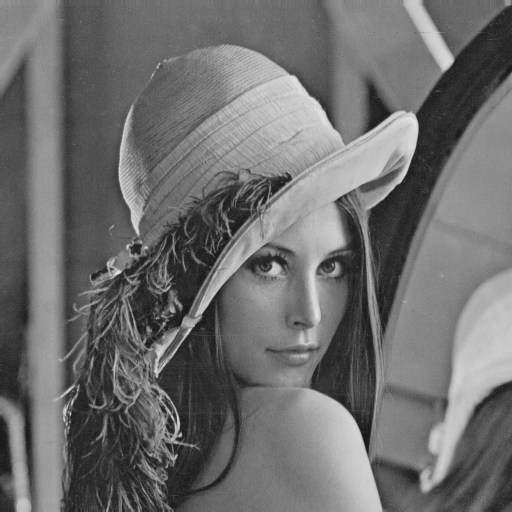





O programa faz uma interpolação Nearest (por vizinho mais próximo) dado um fator n, que é de entrada do usuário. Considere a ambietalização abaixo e insira os parâmetros de entrada para a função descrita anteriormente.

In [ ]:
#@title Esse código reduz ou amplia a imagem em um fator n de escolha do usuário.

def menu(opcao):

    im_path= 'lenna_cinza.png'
    imagem_original = np.array(Image.open(im_path).convert('L'))
    n= int(input("Por qual fator inteiro n a imagem deve ser reduzida?\n"))
    saida = Image.fromarray(interpolacao_nearest(imagem_original,n,opcao).astype('uint8')).convert('RGB')
    pylab.figure(figsize=(10,10)), pylab.imshow(saida), pylab.show()
        

if __name__ == '__main__':
    print('1 - Reduzir por interpolação vizinho mais próximo')
    print('2 - Ampliar por interpolação vizinho mais próximo')
    opcao = int(input('Escolha uma opção:  '))
    menu(opcao)

Para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16:

In [ ]:
valores = [2,4,6,8,16]
for n in valores:
  img = cv2.imread('lenna_cinza.png')
  img_output = interpolacao_nearest(img,n,1).astype('uint8')
  print('Imagem reduzida por n =', n)
  cv2.imwrite("Imagem_Reduzida_por_Nearest_{}.png".format(n), img_output)
  pylab.figure(figsize=(10,10)), pylab.imshow(img_output), pylab.show()


Utilizando o mesmo programa, vamos aumentar as mesmas de volta ao seu tamanho normal. 

In [ ]:
for n in valores:
  img = cv2.imread("Imagem_Reduzida_por_Nearest_{}.png".format(n))
  img_output = interpolacao_nearest(img,n,2).astype('uint8')
  print('Imagem reduzida por n =', n)
  cv2.imwrite("Recuperada_Nearest_{}.png".format(n), img_output)
  pylab.figure(figsize=(10,10)), pylab.imshow(img_output), pylab.show()

Bom, como pode-se observar nas imagens geradas pelo programa, ele não é capaz de recuperar uma imagem a fim de torná-la exatamente igual à original. Esse resultado faz sentido matematicamente se nos atentarmos aos conceitos e formulações que tornam possíveis a interpolação por vizinho mais próximo.  Ainda matematicamente, esse resultado faz mais sentido se pensarmos num índice que calcula o nível de ruído entre as imagens (PSNR), como mostrado a seguir.

**1.1-3** Utilizando a função em Python abaixo, que calcula a relação sinal ruído de pico (PSNR - peak-signal-to-noise-ratio) entre duas imagens, calcule o PSNR entre a imagens originais e as imagens aumentadas (após a redução).  *In the absence of noise, the two images I and K are identical, and thus the MSE is zero. In this case the PSNR is infinite * [1]. Wikipedia

In [ ]:
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [ ]:
valores_c = [2,4,8,16]
calculados = []
img1 = cv2.imread('./lenna_cinza.png')
for n in valores_c:
    img2 = cv2.imread('Recuperada_Nearest_{}.png'.format(n))
    
    calculados.append(calculate_psnr(img2, img1))
from tabulate import tabulate
print('\n')
print(tabulate([['2', calculados[0]], ['4', calculados[1]], ['8', calculados[2]], ['16', calculados[3]]], headers=['N', 'PSNR calculado'], tablefmt='orgtbl'))
print('\n')
print("Há um erro para o valor n = 6 na hora de calcular o valor PSNR")
print('\n')

fig, ax = pylab.subplots()
ax.plot(np.array(valores_c) , np.array(calculados) )

ax.set(xlabel='Fator de redução', ylabel='PSNR', title='PSNR versus n \n')
ax.grid()

pylab.show()

O resultado esperado seria que o PSNR - peak-signal-to-noise-ratio diminuísse conforme o valor do fator de redução (e de ampliação) aumentasse. O resultado obtido pelo item anterior é o esperado, observe que essa relação é obedecida e faz sentido matematicamente. 


# 1.2 - Interpolação Bilinear


>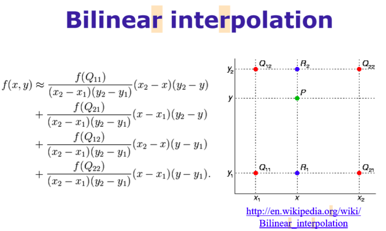





**Modifique a função desenvolvida em 1.1 de forma que ela utilize o algoritmo de interpolação Bilinear.**

In [ ]:
#segue a mesma lógica que a anterior, porém agora é bilinear.
def bilinear(img,n,opcao):
    altura, largura = img.shape[0], img.shape[1]
    if opcao ==1:
      n_altura, n_largura = img.shape[1]//n, img.shape[0]//n
    if opcao == 2:
      n_altura, n_largura = img.shape[1]*n, img.shape[0]*n
    imagem = np.zeros((n_altura,n_largura,3),dtype=np.uint8)
    scale_x, scale_y = float(largura) / n_largura, float(altura) / n_altura
    for y in range(n_altura):
      for x in range(n_largura):

        a = (x + 0.5) * scale_x - 0.5
        b = (y + 0.5) * scale_y - 0.5
        a0 = int(np.floor(a))
        a1 = min(a0 + 1 ,largura - 1)
        b0 = int(np.floor(b))
        b1 = min(b0 + 1, altura - 1)
 
                # calcula a interpolação
        temp0 = (a1 - a) * img[b0,a0] + (a - a0) * img[b0,a1]
        temp1 = (a1 - a) * img[b1,a0] + (a - a0) * img[b1,a1]
        imagem[y,x] = int((b1 - b) * temp0 + (b - b0) * temp1)
 
    return imagem

In [ ]:
#@title Esse código faz uma redução ou ampliação da resolução espacial da imagem usando a Interpolação Bilinear por um fator n fornecido pelo usuário.
def menu(opcao):

    im_path= 'lenna_cinza.png'
    img = np.array(Image.open(im_path).convert('L'))
    n= int(input("Por qual fator inteiro n a imagem deve ser reduzida ou ampliada? \n"))
    saida = Image.fromarray(bilinear(img,n,opcao).astype('uint8')).convert('RGB')
    pylab.figure(figsize=(10,10)), pylab.imshow(saida), pylab.show()
        

if __name__ == '__main__':
    print('1 - Reduzir por interpolação Bilinear')
    print('2 - Ampliar por interpolação Bilinear')
    opcao = int(input('Escolha uma opção:  '))
    menu(opcao)


Novamente, utilize o seu programa para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16. Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original. Visualize todas as imagens obtidas.

De forma análoga ao que foi feito no exercício anterior com a interpolação nearest, segue que 

In [ ]:
for n in valores:
  img = np.array(Image.open('lenna_cinza.png').convert('L'))
  img_output = bilinear(img,n,1).astype('uint8')
  print('Imagem reduzida por n = 2')
  cv2.imwrite("Imagem_Reduzida_por_Bilinear_n{}.png".format(n), img_output)
  pylab.figure(figsize=(10,10)), pylab.imshow(img_output), pylab.show()


Vamos aumentar as imagens obtidas na etapa passada de volta ao tamanho original, também utilizando o algorítmo de Interpolação Bilinear. De forma análoga ao que foi feito no item 1.1, segue que

In [ ]:
#@title Esse código processa as imagens reduzidas no procedimento anterior e recupera a resolução espacial dessas imagens.
n = 2
if n == 2:
  img = np.array(Image.open('Imagem_Reduzida_por_Bilinear_n2.png').convert('L'))
  img_output = Image.fromarray(bilinear(img,n,2).astype('uint8')).convert('RGB')
  print('Imagem (reduzida) ampliada por n = 2')
  img_output.save('Recuperada_Bilinear_n2.png')
  pylab.figure(figsize=(10,10)), pylab.imshow(img_output), pylab.show()

n = 4
img = np.array(Image.open('Imagem_Reduzida_por_Bilinear_n4.png').convert('L'))
if n == 4:
  print('Imagem (reduzida) ampliada por n = 4')
  img_output = Image.fromarray(bilinear(img,n,2).astype('uint8')).convert('RGB')
  img_output.save('Recuperada_Bilinear_n4.png')
  pylab.figure(figsize=(10,10)), pylab.imshow(img_output), pylab.show()

n = 6
img = np.array(Image.open('Imagem_Reduzida_por_Bilinear_n6.png').convert('L'))
if n == 6:
  print('Imagem (reduzida) ampliada por n = 6')
  img_output = Image.fromarray(bilinear(img,n,2).astype('uint8')).convert('RGB')
  img_output.save('Recuperada_Bilinear_n6.png')
  pylab.figure(figsize=(10,10)), pylab.imshow(img_output), pylab.show()

n = 8
img = np.array(Image.open('Imagem_Reduzida_por_Bilinear_n8.png').convert('L'))
if n == 8:
  print('Imagem (reduzida) ampliada por n = 8')
  img_output = Image.fromarray(bilinear(img,n,2).astype('uint8')).convert('RGB')
  img_output.save('Recuperada_Bilinear_n8.png')
  pylab.figure(figsize=(10,10)), pylab.imshow(img_output), pylab.show()

n = 16
img = np.array(Image.open('Imagem_Reduzida_por_Bilinear_n16.png').convert('L'))
if n == 16:
  print('Imagem (reduzida) ampliada por n = 16')
  img_output = Image.fromarray(bilinear(img,n,2).astype('uint8')).convert('RGB')
  img_output.save('Recuperada_Bilinear_n16.png')
  pylab.figure(figsize=(10,10)), pylab.imshow(img_output), pylab.show()

Como pôde-se observar, a imagem recuperada está longe de ser a imagem original (antes de reduzir). Esse resultado é esperado, e pode ser explicado matematicamente pela fórmula da interpolação bilinear. Calculando o valor PSNR entre as imagens recuperadas e a imagem original, como feito no item 1.1, podemos ver que esse resultado faz sentido. 

In [ ]:
valores_c = [2,4,8,16]
calculados = []
img1 = cv2.imread('./lenna_cinza.png')
for n in valores_c:
    img2 = cv2.imread('Recuperada_Bilinear_n{}.png'.format(n))
    
    calculados.append(calculate_psnr(img2, img1))
from tabulate import tabulate
print('\n')
print(tabulate([['2', calculados[0]], ['4', calculados[1]], ['8', calculados[2]], ['16', calculados[3]]], headers=['N', 'PSNR calculado'], tablefmt='orgtbl'))
print('\n')
print("Há um erro para o valor n = 6 na hora de calcular o valor PSNR")
print('\n')

fig, ax = pylab.subplots()
ax.plot(np.array(valores_c) , np.array(calculados) )

ax.set(xlabel='Fator de redução', ylabel='PSNR', title='PSNR versus n \n')
ax.grid()

pylab.show()

Comparando com os resultados obtidos no item 1.1, o valor do PSNR nos permite deduzir que a interpolação Bilinear é um modo mais preciso para fazer alterações na resolução espacial da imagem em questão. Da fórmula do PSNR, se o termo mse é igual a zero, as imagens são as mesmas. 

# 1.3 Implementação de interpolação vs OpenCV

#1.3.1 -  OpenCV Interpolação Nearest e análises pertinentes




> Implementando a interpolação vizinho-mais-próximo utilizando a função pronta do OpenCV (resize), vamos fazer o mesmo procedimento anotado nas etapas anteriores: reduzir as imagens em fatores n, ampliá-las de modo que voltem a sua resolução espacial original e calcular o PSNR. 


In [ ]:
def OpenCV_Nearest(img, n):
  height, width = img.shape[0], img.shape[1] 
  output = cv2.resize(img, (int(width/n), int(height/n)), 0, 0, interpolation = cv2.INTER_NEAREST)
  cv2.imwrite("OpenCV_Neares_n{}.png".format(n), output)
  print("Imagem reduzida pelo OpenCV Nearest Resize, fator n e salva como OpenCV_Neares_n{}.png ".format(n))
  pylab.figure(figsize=(10,10)), pylab.imshow(output), pylab.show()

for n in valores:
  img = cv2.imread('lenna_cinza.png')
  output = OpenCV_Nearest(img, n)

**1.3.1-2** Agora, vamos aplicar a função resize para ampliar a resolução espacial das imagens reduzidas de maneira que elas voltem para o tamanho da original.

In [ ]:
def OpenCV_Nearest2(img, n):
  height, width = img.shape[0], img.shape[1] 
  output = cv2.resize(img, (int(width*n), int(height*n)), 0, 0, interpolation = cv2.INTER_NEAREST)
  cv2.imwrite("OpenCV_Recuperada_n{}.png".format(n), output)
  print("Imagem ampliada pelo OpenCV Nearest Resize, fator n e salva como OpenCV_Recuperada_n{}.png ".format(n))
  pylab.figure(figsize=(10,10)), pylab.imshow(output), pylab.show()

for n in valores:
  img = cv2.imread('OpenCV_Neares_n{}.png'.format(n))
  output = OpenCV_Nearest2(img, n)

**1.3.1-3** Agora, vamos calcular o valor PSNR entre as imagens geradas na etapa anterior e a imagem original.

In [ ]:
valores_c = [2,4,8,16]
calculados = []
img1 = cv2.imread('./lenna_cinza.png')
for n in valores_c:
    img2 = cv2.imread('OpenCV_Recuperada_n{}.png'.format(n))
    
    calculados.append(calculate_psnr(img2, img1))
from tabulate import tabulate
print('\n')
print(tabulate([['2', calculados[0]], ['4', calculados[1]], ['8', calculados[2]], ['16', calculados[3]]], headers=['N', 'PSNR calculado'], tablefmt='orgtbl'))
print('\n')
print("Há um erro para o valor n = 6 na hora de calcular o valor PSNR")
print('\n')

fig, ax = pylab.subplots()
ax.plot(np.array(valores_c) , np.array(calculados) )

ax.set(xlabel='Fator de redução', ylabel='PSNR', title='PSNR versus n \n')
ax.grid()

pylab.show()


# Open CV - Interpolação Bilinear e análises pertinentes

Implementando a interpolação vizinho-mais-próximo utilizando a função pronta do OpenCV (resize), vamos fazer o mesmo procedimento anotado nas etapas anteriores: reduzir as imagens em fatores n, ampliá-las de modo que voltem a sua resolução espacial original e calcular o PSNR.

In [ ]:
def OpenCV_Bilinear(img, n):
  height, width = img.shape[0], img.shape[1] 
  output = cv2.resize(img, (int(width/n), int(height/n)), 0, 0, interpolation = cv2.INTER_LINEAR)
  cv2.imwrite("OpenCV_Bilinear_n{}.png".format(n), output)
  print("Imagem reduzida pelo OpenCV Bilinear Resize, fator n e salva como OpenCV_Bilinear_n{}.png ".format(n))
  pylab.figure(figsize=(10,10)), pylab.imshow(output), pylab.show()

for n in valores:
  img = cv2.imread('lenna_cinza.png')
  output = OpenCV_Bilinear(img, n)

Agora, com as imagens salvas no diretório, vamos aumentar a resolução espacial no mesmo fator n a qual sofreu uma redução.

In [ ]:
def OpenCV_Bilinear2(img, n):
  height, width = img.shape[0], img.shape[1] 
  output = cv2.resize(img, (int(width*n), int(height*n)), 0, 0, interpolation = cv2.INTER_LINEAR)
  cv2.imwrite("OpenCV_Recuperada_Bilinear_n{}.png".format(n), output)
  print("Imagem ampliada pelo OpenCV Bilinear Resize, fator n e salva como OpenCV_Recuperada_Bilinear_n{}.png ".format(n))
  pylab.figure(figsize=(10,10)), pylab.imshow(output), pylab.show()

for n in valores:
  img = cv2.imread('OpenCV_Bilinear_n{}.png'.format(n))
  output = OpenCV_Bilinear2(img, n)

Agora, vamos calcular o PSNR entre as imagens recuperadas e a imagem original.

In [ ]:
valores_c = [2,4,8,16]
calculados = []
img1 = cv2.imread('./lenna_cinza.png')
for n in valores_c:
    img2 = cv2.imread('OpenCV_Recuperada_Bilinear_n{}.png'.format(n))
    
    calculados.append(calculate_psnr(img2, img1))
from tabulate import tabulate
print('\n')
print(tabulate([['2', calculados[0]], ['4', calculados[1]], ['8', calculados[2]], ['16', calculados[3]]], headers=['N', 'PSNR calculado'], tablefmt='orgtbl'))
print('\n')
print("Há um erro para o valor n = 6 na hora de calcular o valor PSNR")
print('\n')

fig, ax = pylab.subplots()
ax.plot(np.array(valores_c) , np.array(calculados) )

ax.set(xlabel='Fator de redução', ylabel='PSNR', title='PSNR versus n \n')
ax.grid()

pylab.show()

# 1.3.3 Análises Pertinentes 

No intuito de fazer uma análise sobre o tempo de processamento com cada um dos métodos abordados (Nearest feita, Bilinear feita, OpenCV nearest e bilinear), vamos utilizar a biblioteca e discutir tanto sobre os valores PSNR gerados até agora, quanto o tempo de processamento. 


In [ ]:
img = cv2.imread("lenna_cinza.png")
im = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
im = Image.fromarray(im.astype('uint8')).convert('RGB')
img = np.array(Image.open('lenna_cinza.png').convert('L'))

for n in valores:


    print('\n~~~~~~~~~ Interpolação Nearest redução n = {}~~~~~~~\n'.format(n))
    
    t0 = time.time()
    im.resize((im.width//n, im.height//n), Image.NEAREST)
    t1 = time.time()
    total = t1-t0
    print('CV2: ', total)
    
    t0 = time.time()
    interpolacao_nearest(img,n,1)
    t1 = time.time()
    total = t1-t0
    print('Item 1.1: ', total)
    
    print('\n~~~~~~~~~ Interpolação Bilinear redução n = {}~~~~~~~\n'.format(n))
    
    t0 = time.time()
    im.resize((im.width//n, im.height//n), Image.BILINEAR)
    t1 = time.time()
    total = t1-t0
    print('CV2: ', total)
    
    t0 = time.time()
    bilinear(img,n,1)
    t1 = time.time()
    total = t1-t0
    print('Item 1.2: ', total)


valores_c = [2,4,8,16]
calculados = []
img1 = cv2.imread('./lenna_cinza.png')
for n in valores_c:
    img2 = cv2.imread('Recuperada_Nearest_{}.png'.format(n))
    
    calculados.append(calculate_psnr(img2, img1))

fig, ax = pylab.subplots()
ax.plot(np.array(valores_c) , np.array(calculados) )

ax.set(xlabel='Fator de redução', ylabel='PSNR', title=' Item 1.1 \n')
ax.grid()

pylab.show()

valores_c = [2,4,8,16]
calculados = []
img1 = cv2.imread('./lenna_cinza.png')
for n in valores_c:
    img2 = cv2.imread('OpenCV_Recuperada_n{}.png'.format(n))
    
    calculados.append(calculate_psnr(img2, img1))

fig, ax = pylab.subplots()
ax.plot(np.array(valores_c) , np.array(calculados) )

ax.set(xlabel='Fator de redução', ylabel='PSNR', title='OpenCV Nearest \n')
ax.grid()

pylab.show()

valores_c = [2,4,8,16]
calculados = []
img1 = cv2.imread('./lenna_cinza.png')
for n in valores_c:
    img2 = cv2.imread('Recuperada_Bilinear_n{}.png'.format(n))
    
    calculados.append(calculate_psnr(img2, img1))

fig, ax = pylab.subplots()
ax.plot(np.array(valores_c) , np.array(calculados) )

ax.set(xlabel='Fator de redução', ylabel='PSNR', title='Item 1.2 \n')
ax.grid()

pylab.show()

valores_c = [2,4,8,16]
calculados = []
img1 = cv2.imread('./lenna_cinza.png')
for n in valores_c:
    img2 = cv2.imread('OpenCV_Recuperada_Bilinear_n{}.png'.format(n))
    
    calculados.append(calculate_psnr(img2, img1))
from tabulate import tabulate
fig, ax = pylab.subplots()
ax.plot(np.array(valores_c) , np.array(calculados) )

ax.set(xlabel='Fator de redução', ylabel='PSNR', title='OpenCV Bilinear \n')
ax.grid()

pylab.show()



Pelos resultados obtidos, pode-se inferir que a Interpolação Nearest, seja do OpenCV quanto a realizada no Item 1.1, é o método de processamento mais rápido. No entanto, é a que gera o menor valor de PSNR entre os métodos estudados. As bilineares, tanto do item 1.2 quanto do OpenCV, apesar de mais lentas em processamento, apresentam um desempenho melhor no PSNR. 

## **Problema 2**: Entrelaçamento (5 pontos)







> Uma câmera de vídeo entrelaçado transmite uma imagem de resolução completa transmitindo primeiro as linhas ́ımpares (em um primeiro quadro) e,  em seguida,  as linhas pares (em um segundo quadro).   A imagem de resolução completa pode ser recuperada combinando-se os quadros pares e ímpares – ver figura abaixo.

> Elabore um programa para montar a imagem de resolução completa, a partir de quadros consecutivos formados por linhas ímpares e pares. Considere, entretanto, que a câmera é defeituosa e que os defeitos só afetam os quadros pares. Nos quadros pares, as linhas de pixels aparecem deslocados pelo valor médio da linha (ou seja, o valor médio da linha foi subtraído das intensidades dos pixels da linha original). **O seu programa deve corrigir esta pertubação de forma que a imagem de resoluão completa reconstruída não apresente defeitos perceptíveis.**

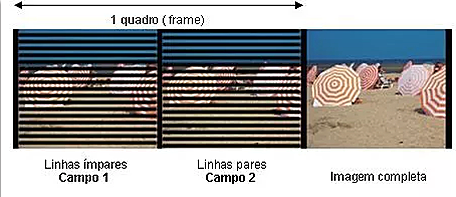

> Para resolver a questão, utilize as imagens em formato mat dos dois quadros (par e \'impar) estão nos endereços abaixo. O código para ler os arquivos mat é dado em seguida.  


*  [link campos pares](https://drive.google.com/file/d/1h4gsP4Wop17dthuh45NerdZJLCH-zt5U/view?usp=sharing)
*   [link campos ímpares](https://drive.google.com/file/d/1P6Z5ciRAh44jExv3sAKgo6WQZyq2it_z/view?usp=sharing)




In [ ]:
#@title Leitura dos arquivos .mat (código disponibilizado). Célula necessária para o funcionamento das seguintes!
from scipy.io import loadmat
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from PIL import Image

# lendo os arquivos em mat da imagem de linhas pares e 
# transferindo apenas a matriz de dados do mat para um array
mat_even = loadmat('even_rows.mat')
img_mateven = mat_even['even_corrupted_channel']

print('Array da imagens de linhas pares:\n')
print('Tipo = ', img_mateven.dtype,'\n')
print('Media dos valores = ', img_mateven.mean(),'\n')
print('Valor Maximo = ', img_mateven.max(),'\n')
print('Valor Minimo = ', img_mateven.min(),'\n\n')
# Dando uma olhada nos dados da matriz de linhas pares
# perceba que a matriz possui valores negativos
# logo, se for salvar o arquivo, é necessário tratar a possível presença de 
# valores negativos!

# lendo os arquivos em mat da imagem de linhas pares e 
# transferindo apenas a matriz de dados do mat para um array
mat_odd = loadmat('odd_rows.mat')
img_matodd = mat_odd['odd_channel']
# Dando uma olhada nos dados da matriz de linhas ímpares
print('Array da imagens de linhas ímpares:\n')
print('Tipo = ', img_matodd.dtype,'\n')
print('Media dos valores = ', img_matodd.mean(),'\n')
print('Valor Maximo = ', img_matodd.max(),'\n')
print('Valor Minimo = ', img_matodd.min(),'\n ')

# visualizando as imagens
print('Visualizando as matrizes')
plt.subplot(1,2,1)
plt.imshow(img_mateven, cmap=plt.cm.gray)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(img_matodd, cmap=plt.cm.gray)
plt.colorbar()

**2.1**   

>Elabore um programa para montar a imagem de resolução completa, a partir de quadros consecutivos formados por linhas ímpares e pares.

In [ ]:
#@title Código para montar a imagem de resolução completa, a partir de quadros consecutivos formados por linhas ímpares e pares.
linhas_impares, colunas = img_mateven.shape[0], img_mateven.shape[1]
linhas_pares, colunas = img_matodd.shape[0], img_matodd.shape[1]
linhas = linhas_impares + linhas_pares
img = np.zeros([linhas, colunas])
for i in range(linhas):
  for j in range(colunas):
    if i%2 == 0:
      img[i][j] = img_mateven[i//2][j]
    else:
      img[i][j] = img_matodd[i//2][j]

cv2.imwrite("Questao2-1.png", img)

True

**2.2**   

>O seu programa deve corrigir esta pertubação de forma que a imagem de resoluão completa reconstruída não apresente defeitos perceptíveis.

In [ ]:
#@title Código para corrigir perturbação da imagem reconstituída na etapa anterior. A imagem fica salva do diretório. 
linhas_impares, colunas = img_mateven.shape[0], img_mateven.shape[1]
linhas_pares, colunas = img_matodd.shape[0], img_matodd.shape[1]
linhas = linhas_impares + linhas_pares
img = np.zeros([linhas, colunas])
for i in range(linhas):
  for j in range(colunas):
    if i%2 == 0:
      img[i][j] = (img_mateven[(i//2)-1][j])/2
      img[i][j] =+ (img_mateven[int(i/2)][j])/2
    else:
      img[i][j] = img_matodd[i//2][j]

cv2.imwrite("Questao2-2.png", img)

True